<a href="https://colab.research.google.com/github/ISithmini/Sentiment-Analysis-Singlish-Dataset/blob/main/CM4340_Assignment_1_184168C_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CM4340 - Natural Language Processing

# **Assignment 1**

Index : 184168C

Name : SITHMINI M.I.

###1. Setup the enviorment


In [ ]:
#install necessary packages and libraries
!pip install sinling
!pip install translate
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import packges
import pandas as pd
import numpy as np
import re
import seaborn as sns
import nltk
from nltk.data import load
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sinling import SinhalaTokenizer
from sinling import SinhalaStemmer
from googletrans import Translator
import pickle

###2. Importing and cleaning the Dataset

In [ ]:
# read csv data - from Singlish_Dataset

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/Singlish_Dataset.csv")
df

,Index,PublicFigure,Statement,Impact,Unnamed: 4
0,184174P,Abisheka Wimalaweera,සාමාන්‍යයෙන් පෞද්ගලික චරිත ගැන ලියන්න හොද නෑ....,Positive,NaN
1,NaN,Roshan Fernando,මම නුවරඑළියේ ඉදන් කොළඹට ඇවිල්ලා ගායකයෙක් වෙන්න...,Positive,NaN
2,NaN,Rasika Jayakodi,Ego system Vs. Eco system \n\nසාමාන්‍යයෙන් ලංක...,Positive,NaN
3,NaN,Peshala Manoj,අද උදේ දැකපු සුන්දර දර්ශණයක්. නුගේගොඩ St.Johns...,Positive,NaN
4,NaN,Mahinda Deshapriya,"Smoking is a bad habit \nMenda , Danee🏏✌.\nCri...",Positive,NaN
...,...,...,...,...,...
1116,NaN,Farhan Nizamdeen,🔴Tragedy🔴 - ලොව වැඩිම අලි මරණ ශ්‍රී ලංකාවෙන්.....,Negative,NaN
1117,NaN,SLTMobitel,රටේ දැනට පවත්නා අලි- මිනිස් ගැටුම් වලට විසඳුමක...,Positive,NaN
1118,NaN,LEOPOCON Sri Lanka,First Leopard Death for the year reported from...,Negative,NaN
1119,NaN,Dr Srimal Fernando,"සත්ව සංරක්ෂණයේ වැදගත්කම ශ්‍රී ලංකාවේ වන අලි 7,...",Negative,NaN


In [ ]:
#Display dataset columns to select the unnecessary columns
df.keys()

Index([' Index', 'PublicFigure', 'Statement', 'Impact', 'Unnamed: 4'], dtype='object')

In [ ]:
#Dropping the unnecessary columns from the dataset
df = df.drop([' Index', 'PublicFigure', 'Unnamed: 4'], axis=1)
df

,Statement,Impact
0,සාමාන්‍යයෙන් පෞද්ගලික චරිත ගැන ලියන්න හොද නෑ....,Positive
1,මම නුවරඑළියේ ඉදන් කොළඹට ඇවිල්ලා ගායකයෙක් වෙන්න...,Positive
2,Ego system Vs. Eco system \n\nසාමාන්‍යයෙන් ලංක...,Positive
3,අද උදේ දැකපු සුන්දර දර්ශණයක්. නුගේගොඩ St.Johns...,Positive
4,"Smoking is a bad habit \nMenda , Danee🏏✌.\nCri...",Positive
...,...,...
1116,🔴Tragedy🔴 - ලොව වැඩිම අලි මරණ ශ්‍රී ලංකාවෙන්.....,Negative
1117,රටේ දැනට පවත්නා අලි- මිනිස් ගැටුම් වලට විසඳුමක...,Positive
1118,First Leopard Death for the year reported from...,Negative
1119,"සත්ව සංරක්ෂණයේ වැදගත්කම ශ්‍රී ලංකාවේ වන අලි 7,...",Negative


In [ ]:
# drop null values in the dataset
df = df.dropna()
df

,Statement,Impact
0,සාමාන්‍යයෙන් පෞද්ගලික චරිත ගැන ලියන්න හොද නෑ....,Positive
1,මම නුවරඑළියේ ඉදන් කොළඹට ඇවිල්ලා ගායකයෙක් වෙන්න...,Positive
2,Ego system Vs. Eco system \n\nසාමාන්‍යයෙන් ලංක...,Positive
3,අද උදේ දැකපු සුන්දර දර්ශණයක්. නුගේගොඩ St.Johns...,Positive
4,"Smoking is a bad habit \nMenda , Danee🏏✌.\nCri...",Positive
...,...,...
1116,🔴Tragedy🔴 - ලොව වැඩිම අලි මරණ ශ්‍රී ලංකාවෙන්.....,Negative
1117,රටේ දැනට පවත්නා අලි- මිනිස් ගැටුම් වලට විසඳුමක...,Positive
1118,First Leopard Death for the year reported from...,Negative
1119,"සත්ව සංරක්ෂණයේ වැදගත්කම ශ්‍රී ලංකාවේ වන අලි 7,...",Negative


In [ ]:
#reset the index numbers after removing null values
df = df.reset_index(drop=True)
df

,Statement,Impact
0,සාමාන්‍යයෙන් පෞද්ගලික චරිත ගැන ලියන්න හොද නෑ....,Positive
1,මම නුවරඑළියේ ඉදන් කොළඹට ඇවිල්ලා ගායකයෙක් වෙන්න...,Positive
2,Ego system Vs. Eco system \n\nසාමාන්‍යයෙන් ලංක...,Positive
3,අද උදේ දැකපු සුන්දර දර්ශණයක්. නුගේගොඩ St.Johns...,Positive
4,"Smoking is a bad habit \nMenda , Danee🏏✌.\nCri...",Positive
...,...,...
1103,🔴Tragedy🔴 - ලොව වැඩිම අලි මරණ ශ්‍රී ලංකාවෙන්.....,Negative
1104,රටේ දැනට පවත්නා අලි- මිනිස් ගැටුම් වලට විසඳුමක...,Positive
1105,First Leopard Death for the year reported from...,Negative
1106,"සත්ව සංරක්ෂණයේ වැදගත්කම ශ්‍රී ලංකාවේ වන අලි 7,...",Negative


In [ ]:
#Add the statement length of a statement as a column - 'StatementLength'
#because there can be exceptional statements like very long or very short in length
df['StatementLength'] = df.apply(lambda row : len(row['Statement']), axis = 1)
df

,Statement,Impact,StatementLength
0,සාමාන්‍යයෙන් පෞද්ගලික චරිත ගැන ලියන්න හොද නෑ....,Positive,479
1,මම නුවරඑළියේ ඉදන් කොළඹට ඇවිල්ලා ගායකයෙක් වෙන්න...,Positive,403
2,Ego system Vs. Eco system \n\nසාමාන්‍යයෙන් ලංක...,Positive,1095
3,අද උදේ දැකපු සුන්දර දර්ශණයක්. නුගේගොඩ St.Johns...,Positive,298
4,"Smoking is a bad habit \nMenda , Danee🏏✌.\nCri...",Positive,91
...,...,...,...
1103,🔴Tragedy🔴 - ලොව වැඩිම අලි මරණ ශ්‍රී ලංකාවෙන්.....,Negative,148
1104,රටේ දැනට පවත්නා අලි- මිනිස් ගැටුම් වලට විසඳුමක...,Positive,297
1105,First Leopard Death for the year reported from...,Negative,240
1106,"සත්ව සංරක්ෂණයේ වැදගත්කම ශ්‍රී ලංකාවේ වන අලි 7,...",Negative,274


####2.1 Removing outliers

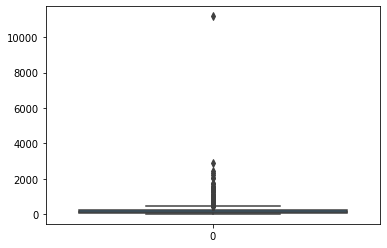

In [ ]:
#box plot display to identify wheather there are outliers in the dataset
sns.boxplot(data=df['StatementLength'])

In [ ]:
from pandas.core.describe import DataFrameDescriber
Q1 = df['StatementLength'].quantile(0.25)
Q3 = df['StatementLength'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outlier_data = df[(df['StatementLength'] < lower_limit) | (df['StatementLength'] > upper_limit)]


In [ ]:
outlier_data.index

Int64Index([   0,    2,    5,    6,    7,    8,    9,   11,   15,   16,   19,
              20,   21,   23,   25,   26,   33,   35,   63,   66,   68,   69,
              70,   78,   79,   80,   87,   88,   91,   95,   96,   98,   99,
             104,  116,  126,  127,  128,  166,  170,  306,  357,  373,  497,
             498,  499,  501,  503,  526,  528,  530,  555,  559,  565,  570,
             571,  572,  573,  780,  786,  789,  791,  794,  798,  805,  816,
             877,  879,  882,  911,  914,  915,  924,  926,  927,  928,  949,
            1010, 1026, 1033, 1049, 1064, 1068, 1071, 1101, 1102],
           dtype='int64')

In [ ]:
outliers = list(outlier_data.index)

In [ ]:
#removing the outliers from the dataset
df = df.drop(outliers)
df

,Statement,Impact,StatementLength
1,මම නුවරඑළියේ ඉදන් කොළඹට ඇවිල්ලා ගායකයෙක් වෙන්න...,Positive,403
3,අද උදේ දැකපු සුන්දර දර්ශණයක්. නුගේගොඩ St.Johns...,Positive,298
4,"Smoking is a bad habit \nMenda , Danee🏏✌.\nCri...",Positive,91
10,හෙළPay for Business\r\niOS App එක මේ වන විට Ap...,Positive,112
12,Shooting වලට නුවර ගියපු මගේ හිත ගිය තැනක්.. ❤️...,Positive,359
...,...,...,...
1103,🔴Tragedy🔴 - ලොව වැඩිම අලි මරණ ශ්‍රී ලංකාවෙන්.....,Negative,148
1104,රටේ දැනට පවත්නා අලි- මිනිස් ගැටුම් වලට විසඳුමක...,Positive,297
1105,First Leopard Death for the year reported from...,Negative,240
1106,"සත්ව සංරක්ෂණයේ වැදගත්කම ශ්‍රී ලංකාවේ වන අලි 7,...",Negative,274


In [ ]:
#reset the index numbers after removing outliers
df = df.reset_index(drop=True)
df

,Statement,Impact,StatementLength
0,මම නුවරඑළියේ ඉදන් කොළඹට ඇවිල්ලා ගායකයෙක් වෙන්න...,Positive,403
1,අද උදේ දැකපු සුන්දර දර්ශණයක්. නුගේගොඩ St.Johns...,Positive,298
2,"Smoking is a bad habit \nMenda , Danee🏏✌.\nCri...",Positive,91
3,හෙළPay for Business\r\niOS App එක මේ වන විට Ap...,Positive,112
4,Shooting වලට නුවර ගියපු මගේ හිත ගිය තැනක්.. ❤️...,Positive,359
...,...,...,...
1017,🔴Tragedy🔴 - ලොව වැඩිම අලි මරණ ශ්‍රී ලංකාවෙන්.....,Negative,148
1018,රටේ දැනට පවත්නා අලි- මිනිස් ගැටුම් වලට විසඳුමක...,Positive,297
1019,First Leopard Death for the year reported from...,Negative,240
1020,"සත්ව සංරක්ෂණයේ වැදගත්කම ශ්‍රී ලංකාවේ වන අලි 7,...",Negative,274


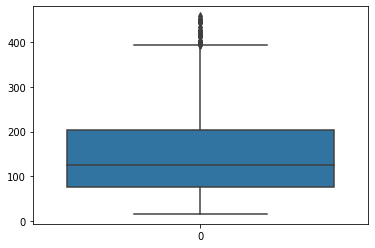

In [ ]:
#draw a boxplot to see the outliers
sns.boxplot(data = df['StatementLength'])

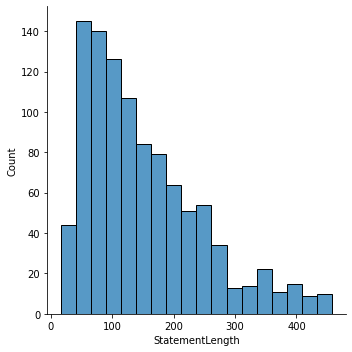

In [ ]:
# Distribution plot to scheck the distribution of lengths in statements
sns.displot(df['StatementLength'])


In [ ]:
#Checking the no of positive and negative statements in the datasets
df.max()
df.min()
impactdata = pd.DataFrame(df['Impact'].value_counts()).reset_index()
impactdata

,index,Impact
0,Positive,517
1,Negative,505


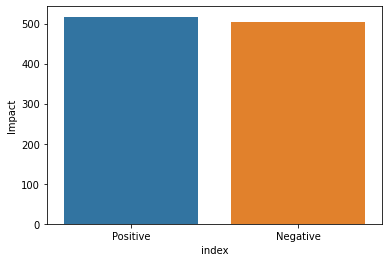

In [ ]:
# Bar plot to check the positive and negative statements in the datasets
sns.barplot(x='index', y= 'Impact', data=impactdata)

In [ ]:
#extracting a random dataset by filtering from statementlength
filtered_df = df[(df.StatementLength <= 200) & (df.StatementLength >= 50)]
filtered_df = filtered_df.reset_index(drop=True)
filtered_df

,Statement,Impact,StatementLength
0,"Smoking is a bad habit \nMenda , Danee🏏✌.\nCri...",Positive,91
1,හෙළPay for Business\r\niOS App එක මේ වන විට Ap...,Positive,112
2,හෙට දිනයේ ආරම්භ වන ආසියානු කුසලාන ක්‍රිකට් තරඟ...,Positive,170
3,"එකාවගේ එකට රට දිනවන්න. Together as one, let's ...",Positive,80
4,මට ආදරය කරන හැමදෙනාටම බොහොම ස්තූතයි මගේ Youtub...,Positive,120
...,...,...,...
667,බ්‍රිතාන්‍ය අගමැතිට සිදු වන දේ ගැන පාඨලී කියූ ...,Negative,143
668,වසන්තට හොඳ වැඩේ කියන ඈයෝ ඩිස්නිලන්තේ ඇප්‍රිසිය...,Negative,65
669,ගෑස් දෙන්නේ ඩීලර්ස්ලා හරහා නොව පිට්ටනිවල දින ...,Negative,122
670,යාල සිද්ධියට සම්බන්ධ පුද්ගලයින් සහ වාහන blackl...,Negative,54


In [ ]:
#Checking the number of positives and negative statments available in the filtered dataset to check wheather it's balanced
impactdata = pd.DataFrame(filtered_df['Impact'].value_counts()).reset_index()
impactdata

,index,Impact
0,Negative,338
1,Positive,334


### 3.Text Cleaning and Transformation

In [ ]:
import string

#Initialize the tokenizer
tokenizer = SinhalaTokenizer()

#Initialize the translator
translator = Translator()

#importing stop words
with open("/content/drive/MyDrive/Colab Notebooks/NLP/stop words.txt", encoding='utf-8') as f:
    stopwords_sinhala = [line.rstrip() for line in f]

# Initialize Sinhala Stemming 
sm = SinhalaStemmer()

#Initialize Lemmatizer
lm = WordNetLemmatizer()

#processing a statement
def process_statement(statement):

  # remove hyperlinks
  statement = re.sub(r'http[s]*\S+||www*\S+', '', statement)

  # convert words to lowercase and replace # symbol from hashtags
  statement = statement.lower().replace('#', '')
 
  #remove punctuation
  statement = "".join([i for i in statement if i not in string.punctuation])

  #Tokenize the strings
  statement = tokenizer.tokenize(statement)

  for i in range(len(statement)):
    if statement[i] not in stopwords_sinhala:   #remove sinhala stop words
      
      translation= translator.translate(statement[i], dest="si") #translate english words to sinhala
      statement[i] = translation.text
      
      stem_word = sm.stem(statement[i]) 
      statement[i] = stem_word[0]

  return statement

filtered_df['Statement'] = filtered_df['Statement'].apply(lambda x: process_statement(x))

In [ ]:
filtered_df['Impact'].replace({'Positive': 1, 'Negative': 0}, inplace=True)

In [ ]:
filtered_df

,Statement,Impact,StatementLength
0,"[දුම්පානය කරන, , ඒ, නරක, පුරුද්, මම අනුමාන කර,...",1,91
1,"[හෙළpay, සදහ, ව්යාපාරික, ios, යෙද, එක, මේ, වන,...",1,112
2,"[හෙ, දින, ආරම්භ, වන, ආසියා, කුසලා, ක්‍රිකට, තර...",1,170
3,"[එකා, එ, ර, දිනව, එක්, පරිදි, එක, ඉඩ දෙ, රැල, ...",1,80
4,"[, ආදර, කර, හැමදෙනා, බොහො, ස්තූත, ම, youtube, ...",1,120
...,...,...,...
667,"[බ්‍රිතාන්‍, අගමැති, සිදු, වන, ද, ගැන, පාඨල, ක...",0,143
668,"[වසන්ත, හොඳ, වැඩ, කිය, ඈ, ඩිස්නිලන්ත, ඇප්‍රිසි...",0,65
669,"[ගෑස, දෙ, ඩීලර්ස්, හරහ, නො, පිට්ටනි, දි, දෙක, ...",0,122
670,"[යා, සිද්ධි, සම්බන්ධ, පුද්ගලය, සහ, වාහ, කළු ලැ...",0,54


###4.Word Frequency Dictionary

In [ ]:
def build_freqs(statements, ys):
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, statement in zip(yslist, statements):
      for word in statement:
        pair = (word, y)
        if pair in freqs:
          freqs[pair] += 1
        else:
          freqs[pair] = 1    

    return freqs

In [ ]:
# create frequency dictionary

statement_corpus = filtered_df['Statement']
labels = filtered_df['Impact']

freqs = build_freqs(statement_corpus, labels)

# check data type
print(f'type(freqs) = {type(freqs)}')

# check length of the dictionary
print(f'len(freqs) = {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) = 4632


In [ ]:
freqs

{('දුම්පානය කරන', 1): 1,
 ('', 1): 136,
 ('ඒ', 1): 52,
 ('නරක', 1): 2,
 ('පුරුද්', 1): 1,
 ('මම අනුමාන කර', 1): 1,
 ('danee🏏✌', 1): 1,
 ('ක්රිකට', 1): 15,
 ('ආදරණ', 1): 8,
 ('br', 1): 2,
 ('ඉ', 1): 20,
 ('නිසා', 1): 10,
 ('150', 1): 1,
 ('ඇති', 1): 8,
 ('හෙළpay', 1): 2,
 ('සදහ', 1): 23,
 ('ව්යාපාරික', 1): 1,
 ('ios', 1): 1,
 ('යෙද', 1): 3,
 ('එක', 1): 117,
 ('මේ', 1): 46,
 ('වන', 1): 8,
 ('විට', 1): 2,
 ('ඇපල', 1): 5,
 ('අනුමත', 1): 1,
 ('සඳහා', 1): 3,
 ('යොමුකර', 1): 1,
 ('ඇත', 1): 9,
 ('අනුමත කර', 1): 1,
 ('ව', 1): 49,
 ('සැණ', 1): 1,
 ('දැන', 1): 8,
 ('කරන්න', 1): 2,
 ('හෙ', 1): 6,
 ('දින', 1): 13,
 ('ආරම්භ', 1): 3,
 ('ආසියා', 1): 13,
 ('කුසලා', 1): 10,
 ('ක්\u200dරිකට', 1): 9,
 ('තරඟාවලි', 1): 1,
 ('සහභාගි', 1): 4,
 ('ශ්ර', 1): 7,
 ('ලං', 1): 13,
 ('කණ්ඩාය', 1): 12,
 ('ඇතුලු', 1): 2,
 ('අන', 1): 2,
 ('සියල', 1): 10,
 ('රට', 1): 13,
 ('ක්\u200dරීඩක', 1): 1,
 ('හ', 1): 33,
 ('ම', 1): 121,
 ('පිරි', 1): 4,
 ('සුභ', 1): 9,
 ('පැත', 1): 12,
 ('එ', 1): 202,
 ('කර', 1): 143,
 ('ආසියා කුසල

###5. Divide the Dataset

In [ ]:
#Split dataset into two sets- train & test
x_train, x_test, y_train, y_test = train_test_split(filtered_df['Statement'], filtered_df['Impact'], random_state=10, train_size=0.8)

print(f"No. of training examples: {x_train.shape[0]}")
print(f"No. of testing examples: {x_test.shape[0]}")

No. of training examples: 537
No. of testing examples: 135


In [ ]:
#Checking the no of positive and negative statements in the training dataset
impactdata = pd.DataFrame(y_train.value_counts()).reset_index()
impactdata

,index,Impact
0,1,278
1,0,259


In [ ]:
#Checking the no of positive and negative statements in the testing dataset
impactdata = pd.DataFrame(y_test.value_counts()).reset_index()
impactdata

,index,Impact
0,0,79
1,1,56


###6.Frequency lookup helper function

In [ ]:
def lookup(freqs, word, label):
    n = 0
    n = freqs.get((word, label), 0)
    return n

###7. Naive bayes model training function returning the logprior and loglikelihood

In [ ]:
def train_naive_bayes(freqs, train_x, train_y):
    loglikelihood = {}
    logprior = 0

    # calculate V, the number of unique words in the vocabulary
    vocab = set([pair[0] for pair in freqs.keys()])
    V = len(vocab)

    # calculate N_pos, N_neg, V_pos, V_neg
    N_pos = N_neg = V_pos = V_neg = 0

    for pair in freqs.keys():
        # if the label is positive (greater than zero)
        if pair[1] > 0:
            # increment the count of unique positive words by 1
            V_pos += 1

            # Increment the number of positive words by the count for this (word, label) pair
            N_pos += freqs[pair]

        # else, the label is negative
        else:
            # increment the count of unique negative words by 1
            V_neg += 1

            # increment the number of negative words by the count for this (word,label) pair
            N_neg += freqs[pair]

    # Calculate D, the number of documents
    D = len(train_y)

    # Calculate D_pos, the number of positive documents
    D_pos = (len(list(filter(lambda x: x > 0, train_y))))

    # Calculate D_neg, the number of negative documents
    D_neg = (len(list(filter(lambda x: x <= 0, train_y))))

    # Calculate logprior
    logprior = np.log(D_pos) - np.log(D_neg)

    # For each word in the vocabulary...
    for word in vocab:
        # get the positive and negative frequency of the word
        freq_pos = lookup(freqs, word, 1)
        freq_neg = lookup(freqs, word, 0)

        # calculate the probability that each word is positive, and negative
        p_w_pos = (freq_pos + 1) / (N_pos + V)
        p_w_neg = (freq_neg + 1) / (N_neg + V)

        # calculate the log likelihood of the word
        loglikelihood[word] = np.log(p_w_pos) - np.log(p_w_neg)

    return logprior, loglikelihood

###8. Creating the Model




In [ ]:
logprior, loglikelihood = train_naive_bayes(freqs, x_train, y_train)

print(logprior)
print(len(loglikelihood))

0.07079305199109953
3810


##9.Statements Prediction Function


In [ ]:
def naive_bayes_predict(statement, logprior, loglikelihood):

    # since the dataset is preprocessed before splitting into training and testing word_1 is assigned to statement
    word_l = statement

    # initialize probability to zero
    p = 0

    # add the logprior
    p += logprior


    for word in word_l:

        # check if the word exists in the loglikelihood dictionary
        if word in loglikelihood:
            # add the log likelihood of that word to the probability
            p += loglikelihood[word]

    return p

In [ ]:
def predictions(sample):
    y_hats = []
    for statement in sample:
        # if the prediction is > 0
        if naive_bayes_predict(statement, logprior, loglikelihood) > 0:
            # the predicted class is 1
            y_hat_i = 1
        else:
            # otherwise the predicted class is 0
            y_hat_i = 0

        # append the predicted class to the list y_hats
        y_hats.append(y_hat_i)
    return y_hats

##10.Predict Random Samples

In [ ]:
random_indices = np.random.randint(0, len(x_test) - 1, 5)
test_list = np.take(x_test, random_indices)
test_list = list(test_list.apply(lambda x: " ".join(x)))
test_list

['දුරකථ ම ඉහල සමහර ආයත ලංකා අතහැර  දුරකථ එ ග එක හීන වන හැඩ',
 'අපි ආ කිව් කිය සල්ලි ටික අර වංච ක කාන්තා ව හො ගත්ත නම් රට සංවර්ධන ඒක දී අපි හිර ය අම්මප',
 'ඇයි රැ ගි එ ද ය තිබ්බ න සමාන 😂 බොරු උපත ඔක  පෙ බැlife එ සම්පූර්ණ නාට් එයා',
 'මේ ර හද බෑ පට් දූප වාසි ගෝත්\u200dරක  හ ල්ල ඉ රට ම 😂🤦\u200d♂️ ප වැඩ අර ගුරුතුම',
 'දුනි ට දී වටි පුදුම තෑග්ග එක මොකක් කිය බල වීඩි එක බල']

In [ ]:
y_hats = predictions(test_list)

print(y_hats)

data = {
    "Statement": [],
    "Impact": []
}
for i in range(5):
    data["Statement"].append(test_list[i])
    data["Impact"].append("positive" if y_hats[i] > 0 else "negative")
pd.DataFrame(data)

[0, 0, 0, 0, 0]


,Statement,Impact
0,දුරකථ ම ඉහල සමහර ආයත ලංකා අතහැර දුරකථ එ ග එක ...,negative
1,අපි ආ කිව් කිය සල්ලි ටික අර වංච ක කාන්තා ව හො ...,negative
2,ඇයි රැ ගි එ ද ය තිබ්බ න සමාන 😂 බොරු උපත ඔක පෙ...,negative
3,මේ ර හද බෑ පට් දූප වාසි ගෝත්‍රක හ ල්ල ඉ රට ම ...,negative
4,දුනි ට දී වටි පුදුම තෑග්ග එක මොකක් කිය බල වීඩි...,negative


In [ ]:
def test_naive_bayes(test_x, test_y, logprior, loglikelihood):
    accuracy = 0  # return this properly

    y_hats = predictions(test_x)

    # error is the average of the absolute values of the differences between y_hats and test_y
    error = np.mean(np.absolute(test_y - y_hats))

    # Accuracy is 1 minus the error
    accuracy = 1 - error

    return accuracy

In [ ]:
#checking the accuracy 
acc = test_naive_bayes(x_test, y_test, logprior, loglikelihood)
print(acc)
#print("Naive Bayes accuracy = %0.4f" % (test_naive_bayes(sent_list, y_list, logprior, loglikelihood)))

0.9925925925925926


###Evalaution Review

Emojis can be meaningfully represented during preprocessing by evaluting the meanings of emojis as positve impact and negative impact.
and also more data  can be added to improve the accuracy.
